In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Set plotting style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

In [3]:
# Download gold price data
gold_data = pd.read_csv('https://raw.githubusercontent.com/datasets/gold-prices/master/data/monthly.csv')

In [4]:
# Display the first few rows
gold_data.head()

,Date,Price
0,1833-01,18.93
1,1833-02,18.93
2,1833-03,18.93
3,1833-04,18.93
4,1833-05,18.93


In [5]:
# Check basic information about the dataset
print("Dataset shape:", gold_data.shape)
print("\nData types:")
print(gold_data.dtypes)
print("\nBasic statistics:")
print(gold_data.describe())

Dataset shape: (2304, 2)

Data types:
Date      object
Price    float64
dtype: object

Basic statistics:
             Price
count  2304.000000
mean    211.477345
std     431.544935
min      17.060000
25%      18.937500
50%      20.670000
75%     163.067500
max    2690.080000


In [6]:
# Check for missing values
print("\nMissing values:")
print(gold_data.isnull().sum())


Missing values:
Date     0
Price    0
dtype: int64


In [7]:
# Convert 'Date' to datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [8]:
# Extract year and month for additional analysis
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month

In [9]:
# Sort data by date (to ensure chronological order)
gold_data = gold_data.sort_values('Date')

In [10]:
# Calculate year-over-year percentage change
gold_data['YoY_Change'] = gold_data.groupby(gold_data['Date'].dt.month)['Price'].pct_change(12) * 100

In [11]:
# Reset index for cleaner plotting
gold_data = gold_data.reset_index(drop=True)

gold_data.head()

,Date,Price,Year,Month,YoY_Change
0,1833-01-01,18.93,1833,1,NaN
1,1833-02-01,18.93,1833,2,NaN
2,1833-03-01,18.93,1833,3,NaN
3,1833-04-01,18.93,1833,4,NaN
4,1833-05-01,18.93,1833,5,NaN


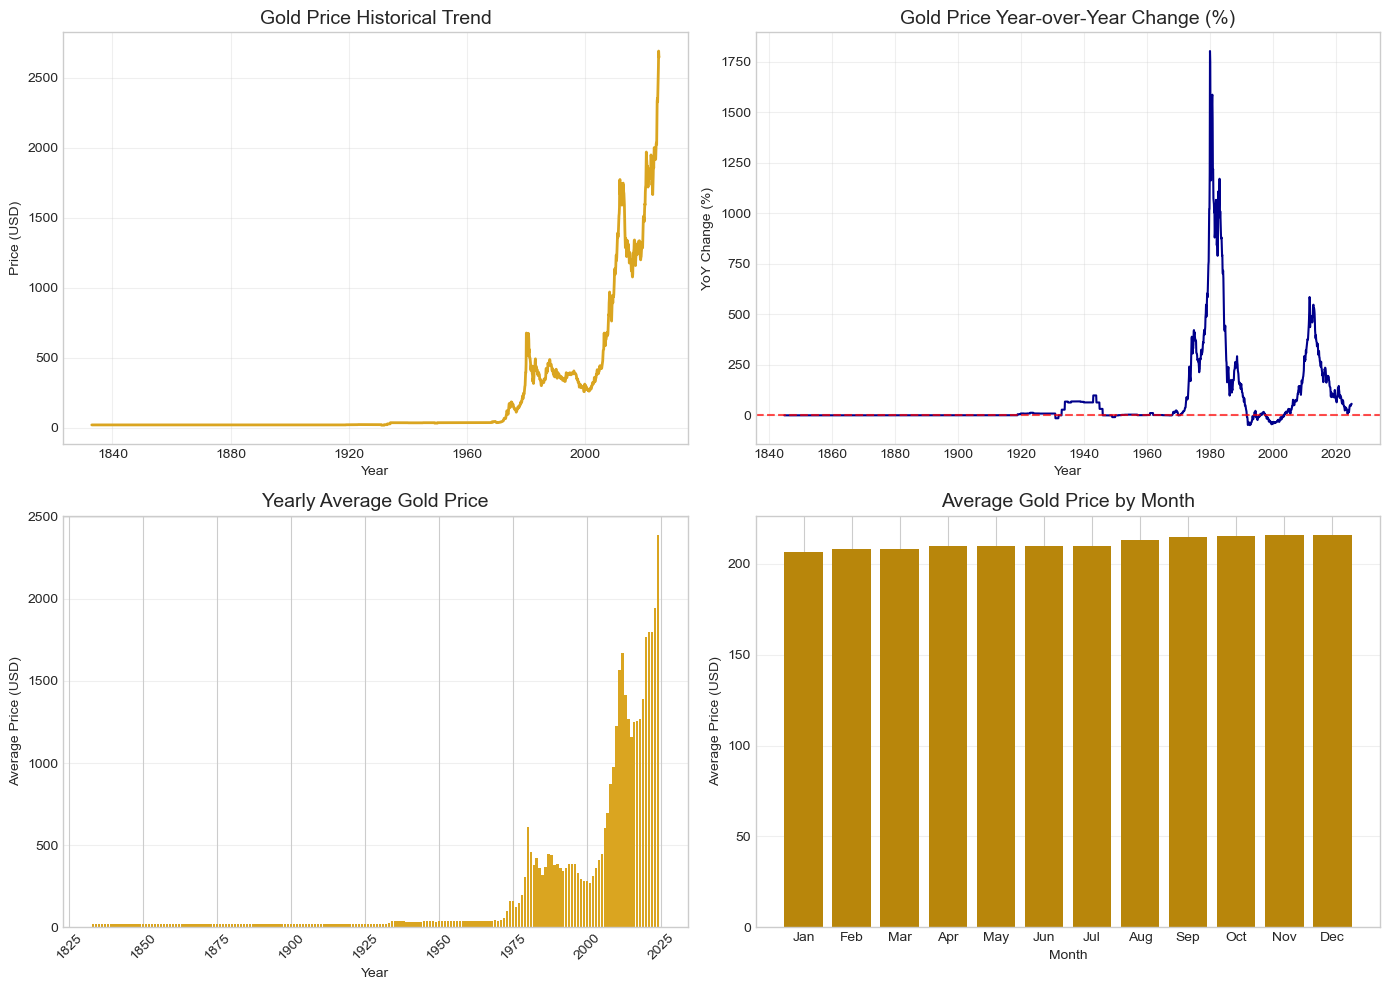

In [12]:
# Set up a figure with multiple subplots
plt.figure(figsize=(14, 10))

# Plot 1: Overall price trend
plt.subplot(2, 2, 1)
plt.plot(gold_data['Date'], gold_data['Price'], color='goldenrod', linewidth=2)
plt.title('Gold Price Historical Trend', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)

# Plot 2: Year-over-year percentage change
plt.subplot(2, 2, 2)
plt.plot(gold_data['Date'], gold_data['YoY_Change'], color='darkblue', linewidth=1.5)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.title('Gold Price Year-over-Year Change (%)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('YoY Change (%)')
plt.grid(True, alpha=0.3)

# Plot 3: Yearly average prices
yearly_avg = gold_data.groupby('Year')['Price'].mean().reset_index()
plt.subplot(2, 2, 3)
bars = plt.bar(yearly_avg['Year'], yearly_avg['Price'], color='goldenrod')
plt.title('Yearly Average Gold Price', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Plot 4: Monthly seasonal patterns
monthly_avg = gold_data.groupby('Month')['Price'].mean().reset_index()
plt.subplot(2, 2, 4)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, monthly_avg['Price'], color='darkgoldenrod')
plt.title('Average Gold Price by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

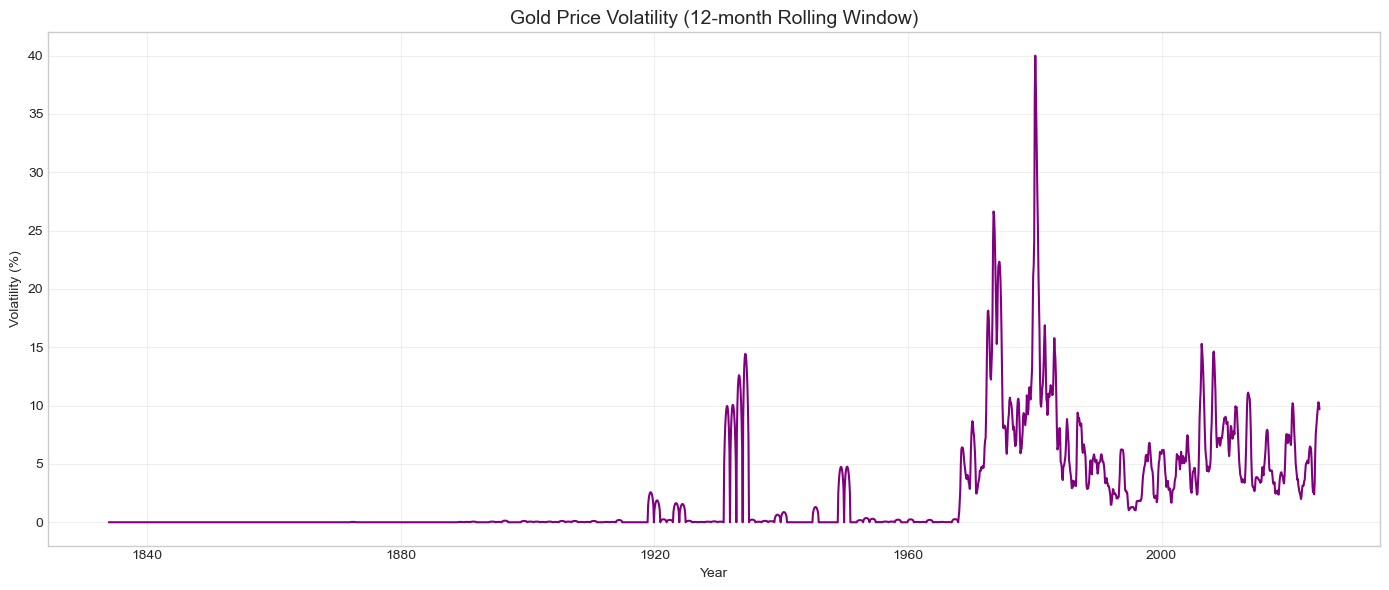

Periods of Significant Growth (>30% YoY):
Date: 1934-01, Price: $34.69, YoY Change: 67.91%
Date: 1934-02, Price: $34.69, YoY Change: 67.91%
Date: 1934-03, Price: $34.69, YoY Change: 67.91%
Date: 1934-04, Price: $34.69, YoY Change: 67.91%
Date: 1934-05, Price: $34.69, YoY Change: 67.91%
Date: 1934-06, Price: $34.69, YoY Change: 67.91%
Date: 1934-07, Price: $34.69, YoY Change: 67.91%
Date: 1934-08, Price: $34.69, YoY Change: 67.91%
Date: 1934-09, Price: $34.69, YoY Change: 67.91%
Date: 1934-10, Price: $34.69, YoY Change: 67.91%
Date: 1934-11, Price: $34.69, YoY Change: 67.91%
Date: 1934-12, Price: $34.69, YoY Change: 67.91%
Date: 1935-01, Price: $34.84, YoY Change: 63.41%
Date: 1935-02, Price: $34.84, YoY Change: 63.41%
Date: 1935-03, Price: $34.84, YoY Change: 63.41%
Date: 1935-04, Price: $34.84, YoY Change: 63.41%
Date: 1935-05, Price: $34.84, YoY Change: 63.41%
Date: 1935-06, Price: $34.84, YoY Change: 63.41%
Date: 1935-07, Price: $34.84, YoY Change: 63.41%
Date: 1935-08, Price: $34.8

In [13]:
# Calculate rolling statistics
window = 12  # 12-month window
gold_data['Rolling_Mean'] = gold_data['Price'].rolling(window=window).mean()
gold_data['Rolling_Std'] = gold_data['Price'].rolling(window=window).std()
gold_data['Volatility'] = gold_data['Rolling_Std'] / gold_data['Rolling_Mean'] * 100

# Create the volatility plot
plt.figure(figsize=(14, 6))
plt.plot(gold_data['Date'], gold_data['Volatility'], color='purple', linewidth=1.5)
plt.title('Gold Price Volatility (12-month Rolling Window)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Volatility (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Identify significant growth periods (periods where price increased by more than 30% YoY)
significant_growth = gold_data[gold_data['YoY_Change'] > 30].copy()
significant_decline = gold_data[gold_data['YoY_Change'] < -15].copy()

print("Periods of Significant Growth (>30% YoY):")
for _, row in significant_growth.iterrows():
    print(f"Date: {row['Date'].strftime('%Y-%m')}, Price: ${row['Price']:.2f}, YoY Change: {row['YoY_Change']:.2f}%")

print("\nPeriods of Significant Decline (<-15% YoY):")
for _, row in significant_decline.iterrows():
    print(f"Date: {row['Date'].strftime('%Y-%m')}, Price: ${row['Price']:.2f}, YoY Change: {row['YoY_Change']:.2f}%")

Training RMSE: $86.94
Testing RMSE: $935.75
R² Score: -1.3552


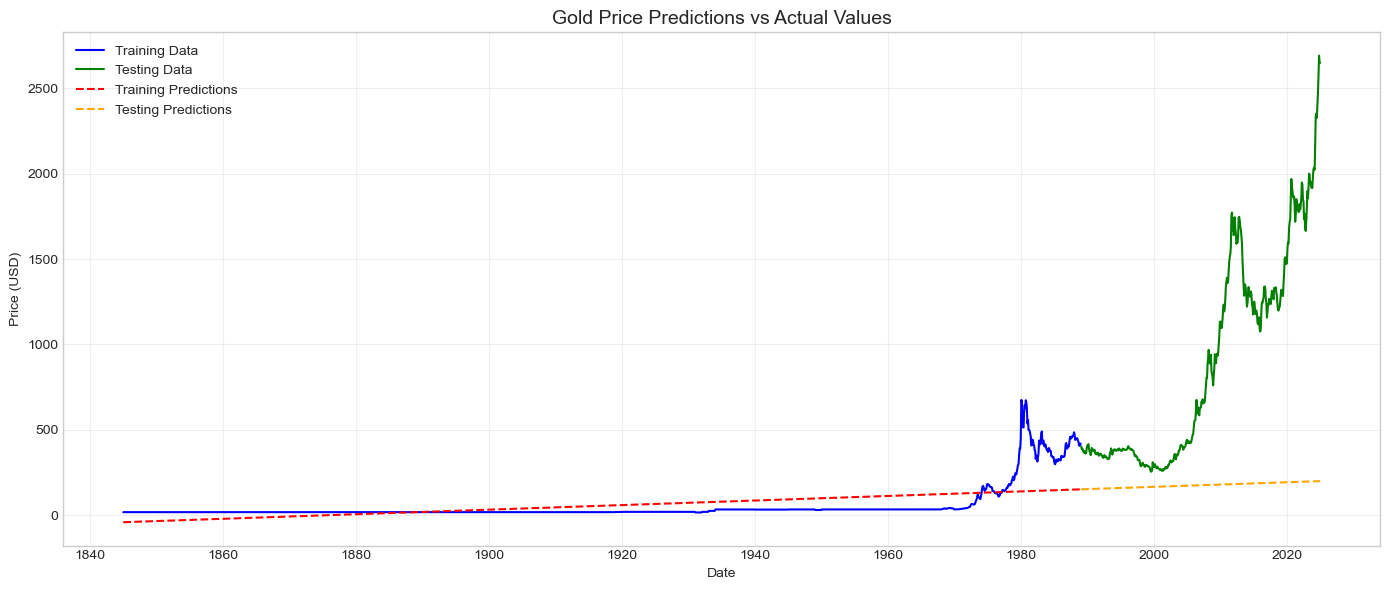

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Create features based on time components
recent_data = gold_data.dropna().copy()  # Drop rows with NaN values

# Prepare features
X = recent_data[['Year', 'Month']].copy()  # Simple time-based features
y = recent_data['Price'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80-20 split)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
r2 = r2_score(y_test, test_predictions)

print(f"Training RMSE: ${train_rmse:.2f}")
print(f"Testing RMSE: ${test_rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Visualize predictions
plt.figure(figsize=(14, 6))
plt.plot(recent_data['Date'][:train_size], y_train, label='Training Data', color='blue')
plt.plot(recent_data['Date'][train_size:], y_test, label='Testing Data', color='green')
plt.plot(recent_data['Date'][:train_size], train_predictions, label='Training Predictions', color='red', linestyle='--')
plt.plot(recent_data['Date'][train_size:], test_predictions, label='Testing Predictions', color='orange', linestyle='--')
plt.title('Gold Price Predictions vs Actual Values', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# Save the model and scaler
import joblib
joblib.dump(model, 'gold_price_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

# Save some key visualizations for our web app
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Date'], gold_data['Price'], color='goldenrod', linewidth=2)
plt.title('Historical Gold Prices (USD)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('historical_prices.png')
plt.close()

# Save yearly average chart
plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_avg['Year'], yearly_avg['Price'], color='goldenrod')
plt.title('Yearly Average Gold Price', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('yearly_averages.png')
plt.close()